In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Importing CSVs

In [2]:
airports_ex = pd.read_csv('airports-extended.csv')
routes = pd.read_csv('routes.csv')
airlines = pd.read_csv('airlines.csv')

## Preprocessing airports data

In [3]:
airports_ex.head()

,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08168983459,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
#new_row = pd.DataFrame({'Courses':'Hyperion', 'Fee':24000, 'Duration':'55days', 'Discount':1800}, index=[0])
#df2 = pd.concat([new_row,df.loc[:]]).reset_index(drop=True)
#print (df2)


airports_ex.columns = ['Airport_ID', 'Airport_Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone','Type', 'Source']

In [5]:
airports_ex.head()

,Airport_ID,Airport_Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [6]:
airports_ex['Type'].value_counts()

airport    8263
station    1332
unknown    1320
port        101
Name: Type, dtype: int64

In [7]:
airports =  airports_ex.drop(airports_ex.loc[airports_ex['Type'] != 'airport' ].index)

In [8]:
airports['Type'].value_counts()

airport    8263
Name: Type, dtype: int64

In [9]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8263 entries, 0 to 12665
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airport_ID             8263 non-null   int64  
 1   Airport_Name           8263 non-null   object 
 2   City                   8214 non-null   object 
 3   Country                8263 non-null   object 
 4   IATA                   6471 non-null   object 
 5   ICAO                   7754 non-null   object 
 6   Latitude               8263 non-null   float64
 7   Longitude              8263 non-null   float64
 8   Altitude               8263 non-null   int64  
 9   Timezone               7910 non-null   float64
 10  DST                    7910 non-null   object 
 11  Tz database time zone  7147 non-null   object 
 12  Type                   8263 non-null   object 
 13  Source                 8263 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 968.3+

## VIS_1: Top 20 COuntries with most number of Airports

In [10]:
airports['Country'].value_counts()

United States    1752
Canada            459
Australia         343
Russia            271
Brazil            269
                 ... 
Isle of Man         1
Jersey              1
West Bank           1
Gambia              1
Wake Island         1
Name: Country, Length: 237, dtype: int64

In [11]:
plot_df = (
    airports['Country'].value_counts()
        .head(20)
        .rename_axis('Country')
        .reset_index(name='no_of_airports')
)
plot_df

,Country,no_of_airports
0,United States,1752
1,Canada,459
2,Australia,343
3,Russia,271
4,Brazil,269
5,Germany,257
6,China,251
7,France,221
8,United Kingdom,177
9,Indonesia,158


[Text(0, 0, '1752'),
 Text(0, 0, '459'),
 Text(0, 0, '343'),
 Text(0, 0, '271'),
 Text(0, 0, '269'),
 Text(0, 0, '257'),
 Text(0, 0, '251'),
 Text(0, 0, '221'),
 Text(0, 0, '177'),
 Text(0, 0, '158'),
 Text(0, 0, '153'),
 Text(0, 0, '131'),
 Text(0, 0, '103'),
 Text(0, 0, '96'),
 Text(0, 0, '88'),
 Text(0, 0, '86'),
 Text(0, 0, '83'),
 Text(0, 0, '80'),
 Text(0, 0, '78'),
 Text(0, 0, '78')]

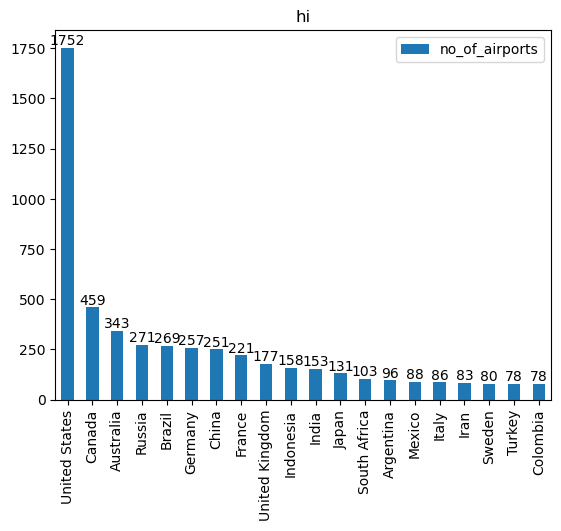

In [12]:
x_labels = plot_df['Country']
fig = plot_df.plot(kind='bar')
plt.title('Top 20 COuntries with most number of Airports')
fig.set_xticklabels(x_labels)
fig.bar_label(fig.containers[0], label_type='edge')

In [13]:
plot_df1 = (
    airports['Country'].value_counts()
        .rename_axis('Country')
        .reset_index(name='no_of_airports')
)
plot_df1

,Country,no_of_airports
0,United States,1752
1,Canada,459
2,Australia,343
3,Russia,271
4,Brazil,269
...,...,...
232,Isle of Man,1
233,Jersey,1
234,West Bank,1
235,Gambia,1


In [14]:
plot_df2 = plot_df1[plot_df1.no_of_airports <= 1]
#np.array()

<BarContainer object of 27 artists>

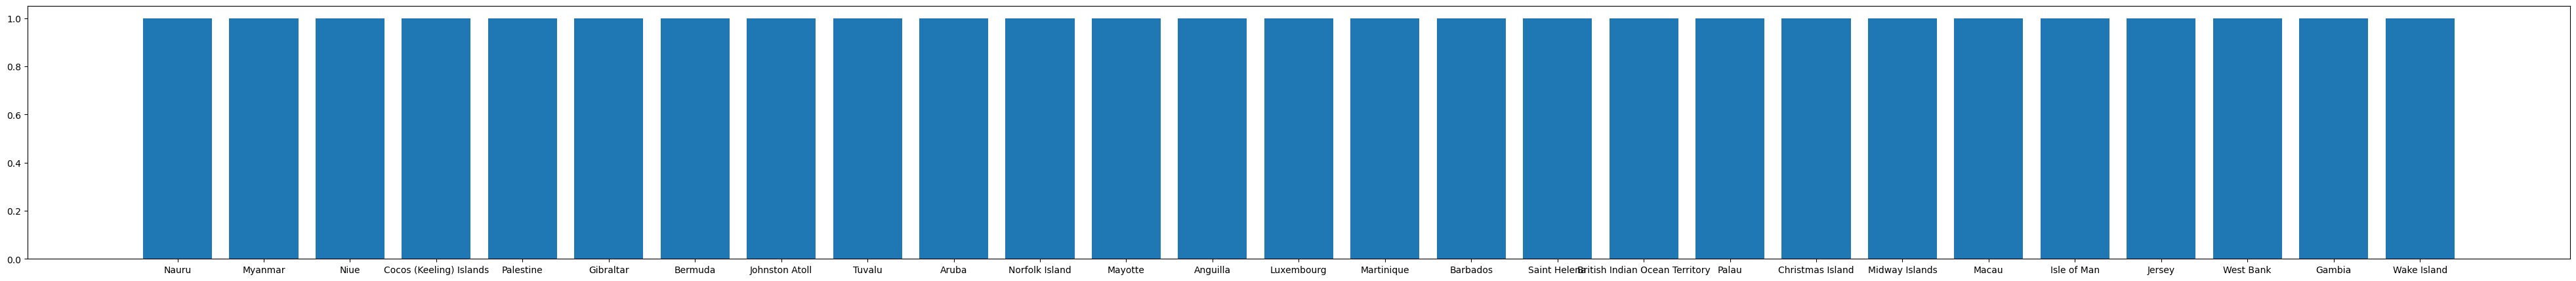

In [15]:
plt.figure(figsize = (50,5))
plt.bar(plot_df2['Country'], plot_df2['no_of_airports'])

## Preprocessing Routes data

In [16]:
routes.head()

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [17]:
routes.columns = ['Airline_IATA', 'Airline_ID', 'Source_airport', 'Source_airport_ID', 'Destination_airport', 'Destination_airport_ID', 'Codeshare', 'Stops', 'Equipment']

In [18]:
routes

,Airline_IATA,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Codeshare,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67658,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67659,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67660,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [19]:
routes.isnull().sum()

Airline_IATA                  0
Airline_ID                    0
Source_airport                0
Source_airport_ID             0
Destination_airport           0
Destination_airport_ID        0
Codeshare                 53065
Stops                         0
Equipment                    18
dtype: int64

In [20]:
routes.drop(['Codeshare'], axis=1,inplace = True)

## Preprocessing Airline data

In [21]:
airlines.head()

,-1,Unknown,\N,-,N/A,\N.1,\N.2,Y
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N


In [22]:
airlines.columns = ['Airline_ID', 'Airline_Name', 'Airline_Alias', 'Airline_IATA', 'Airline_ICAO', 'Callsign', 'Airline_Country', 'Active']

In [23]:
airlines

,Airline_ID,Airline_Name,Airline_Alias,Airline_IATA,Airline_ICAO,Callsign,Airline_Country,Active
0,1,Private flight,\N,-,NaN,NaN,NaN,Y
1,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,\N,NaN,TFU,NaN,Russia,N
...,...,...,...,...,...,...,...,...
6156,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
6157,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
6158,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
6159,21270,Air Carnival,NaN,2S,\N,NaN,India,Y


In [24]:
airlines.isnull().sum()

Airline_ID            0
Airline_Name          0
Airline_Alias       506
Airline_IATA       4627
Airline_ICAO         86
Callsign            808
Airline_Country      15
Active                0
dtype: int64

In [25]:
airlines_df = airlines[['Airline_Name', 'Airline_IATA']]
airlines_df.head()

,Airline_Name,Airline_IATA
0,Private flight,-
1,135 Airways,NaN
2,1Time Airline,1T
3,2 Sqn No 1 Elementary Flying Training School,NaN
4,213 Flight Unit,NaN


In [26]:
airline_routes = pd.merge(left = airlines_df, 
                 right = routes,
                 how= 'right',
                 left_on='Airline_IATA',
                 right_on='Airline_IATA',
                 suffixes=('_x', '_y'))

In [27]:
airline_routes

,Airline_Name,Airline_IATA,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Stops,Equipment
0,Aerocondor,2B,410,ASF,2966,KZN,2990,0,CR2
1,Aerocondor,2B,410,ASF,2966,MRV,2962,0,CR2
2,Aerocondor,2B,410,CEK,2968,KZN,2990,0,CR2
3,Aerocondor,2B,410,CEK,2968,OVB,4078,0,CR2
4,Aerocondor,2B,410,DME,4029,KZN,2990,0,CR2
...,...,...,...,...,...,...,...,...,...
78215,Regional Express,ZL,4178,WYA,6334,ADL,3341,0,SF3
78216,Apache Air,ZM,19016,DME,4029,FRU,2912,0,734
78217,Apache Air,ZM,19016,FRU,2912,DME,4029,0,734
78218,Apache Air,ZM,19016,FRU,2912,OSS,2913,0,734


In [28]:
airline_routes.isnull().sum()

Airline_Name              852
Airline_IATA                0
Airline_ID                  0
Source_airport              0
Source_airport_ID           0
Destination_airport         0
Destination_airport_ID      0
Stops                       0
Equipment                  19
dtype: int64

In [29]:
airports.columns

Index(['Airport_ID', 'Airport_Name', 'City', 'Country', 'IATA', 'ICAO',
       'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST',
       'Tz database time zone', 'Type', 'Source'],
      dtype='object')

In [30]:
airports_info =  airports[['IATA','Airport_Name', 'City', 'Country','Latitude', 'Longitude']]

In [31]:
airports_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8263 entries, 0 to 12665
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   IATA          6471 non-null   object 
 1   Airport_Name  8263 non-null   object 
 2   City          8214 non-null   object 
 3   Country       8263 non-null   object 
 4   Latitude      8263 non-null   float64
 5   Longitude     8263 non-null   float64
dtypes: float64(2), object(4)
memory usage: 451.9+ KB


In [32]:
airline_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78220 entries, 0 to 78219
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline_Name            77368 non-null  object
 1   Airline_IATA            78220 non-null  object
 2   Airline_ID              78220 non-null  object
 3   Source_airport          78220 non-null  object
 4   Source_airport_ID       78220 non-null  object
 5   Destination_airport     78220 non-null  object
 6   Destination_airport_ID  78220 non-null  object
 7   Stops                   78220 non-null  int64 
 8   Equipment               78201 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.0+ MB


In [33]:
airline_routes.isnull().sum()

Airline_Name              852
Airline_IATA                0
Airline_ID                  0
Source_airport              0
Source_airport_ID           0
Destination_airport         0
Destination_airport_ID      0
Stops                       0
Equipment                  19
dtype: int64

In [34]:
airline_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78220 entries, 0 to 78219
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline_Name            77368 non-null  object
 1   Airline_IATA            78220 non-null  object
 2   Airline_ID              78220 non-null  object
 3   Source_airport          78220 non-null  object
 4   Source_airport_ID       78220 non-null  object
 5   Destination_airport     78220 non-null  object
 6   Destination_airport_ID  78220 non-null  object
 7   Stops                   78220 non-null  int64 
 8   Equipment               78201 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.0+ MB


In [35]:
airline_routes1 = pd.merge(left = airports_info, 
                 right = airline_routes,
                 how= 'right',
                 left_on='IATA',
                 right_on='Source_airport',
                 suffixes=('_x', '_y'))

In [36]:
airline_routes1

,IATA,Airport_Name,City,Country,Latitude,Longitude,Airline_Name,Airline_IATA,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Stops,Equipment
0,ASF,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Aerocondor,2B,410,ASF,2966,KZN,2990,0,CR2
1,ASF,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,Aerocondor,2B,410,ASF,2966,MRV,2962,0,CR2
2,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Aerocondor,2B,410,CEK,2968,KZN,2990,0,CR2
3,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,Aerocondor,2B,410,CEK,2968,OVB,4078,0,CR2
4,DME,Domodedovo International Airport,Moscow,Russia,55.408798,37.906300,Aerocondor,2B,410,DME,4029,KZN,2990,0,CR2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78215,WYA,Whyalla Airport,Whyalla,Australia,-33.058899,137.514008,Regional Express,ZL,4178,WYA,6334,ADL,3341,0,SF3
78216,DME,Domodedovo International Airport,Moscow,Russia,55.408798,37.906300,Apache Air,ZM,19016,DME,4029,FRU,2912,0,734
78217,FRU,Manas International Airport,Bishkek,Kyrgyzstan,43.061298,74.477600,Apache Air,ZM,19016,FRU,2912,DME,4029,0,734
78218,FRU,Manas International Airport,Bishkek,Kyrgyzstan,43.061298,74.477600,Apache Air,ZM,19016,FRU,2912,OSS,2913,0,734


In [37]:
airline_routes2 = pd.merge(left = airports_info, 
                 right = airline_routes1,
                 how= 'right',
                 left_on='IATA',
                 right_on='Destination_airport',
                 suffixes=('_d', '_s'))

In [38]:
airline_routes2

,IATA_d,Airport_Name_d,City_d,Country_d,Latitude_d,Longitude_d,IATA_s,Airport_Name_s,City_s,Country_s,...,Longitude_s,Airline_Name,Airline_IATA,Airline_ID,Source_airport,Source_airport_ID,Destination_airport,Destination_airport_ID,Stops,Equipment
0,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,ASF,Astrakhan Airport,Astrakhan,Russia,...,48.006302,Aerocondor,2B,410,ASF,2966,KZN,2990,0,CR2
1,MRV,Mineralnyye Vody Airport,Mineralnye Vody,Russia,44.225101,43.081902,ASF,Astrakhan Airport,Astrakhan,Russia,...,48.006302,Aerocondor,2B,410,ASF,2966,MRV,2962,0,CR2
2,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,...,61.503300,Aerocondor,2B,410,CEK,2968,KZN,2990,0,CR2
3,OVB,Tolmachevo Airport,Novosibirsk,Russia,55.012600,82.650703,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,...,61.503300,Aerocondor,2B,410,CEK,2968,OVB,4078,0,CR2
4,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,DME,Domodedovo International Airport,Moscow,Russia,...,37.906300,Aerocondor,2B,410,DME,4029,KZN,2990,0,CR2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78215,ADL,Adelaide International Airport,Adelaide,Australia,-34.945000,138.531006,WYA,Whyalla Airport,Whyalla,Australia,...,137.514008,Regional Express,ZL,4178,WYA,6334,ADL,3341,0,SF3
78216,FRU,Manas International Airport,Bishkek,Kyrgyzstan,43.061298,74.477600,DME,Domodedovo International Airport,Moscow,Russia,...,37.906300,Apache Air,ZM,19016,DME,4029,FRU,2912,0,734
78217,DME,Domodedovo International Airport,Moscow,Russia,55.408798,37.906300,FRU,Manas International Airport,Bishkek,Kyrgyzstan,...,74.477600,Apache Air,ZM,19016,FRU,2912,DME,4029,0,734
78218,OSS,Osh Airport,Osh,Kyrgyzstan,40.609001,72.793297,FRU,Manas International Airport,Bishkek,Kyrgyzstan,...,74.477600,Apache Air,ZM,19016,FRU,2912,OSS,2913,0,734


In [39]:
airline_routes2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78220 entries, 0 to 78219
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IATA_d                  77957 non-null  object 
 1   Airport_Name_d          77957 non-null  object 
 2   City_d                  77955 non-null  object 
 3   Country_d               77957 non-null  object 
 4   Latitude_d              77957 non-null  float64
 5   Longitude_d             77957 non-null  float64
 6   IATA_s                  77965 non-null  object 
 7   Airport_Name_s          77965 non-null  object 
 8   City_s                  77963 non-null  object 
 9   Country_s               77965 non-null  object 
 10  Latitude_s              77965 non-null  float64
 11  Longitude_s             77965 non-null  float64
 12  Airline_Name            77368 non-null  object 
 13  Airline_IATA            78220 non-null  object 
 14  Airline_ID              78220 non-null

### Dropping unnceesaary columns to create final routes dataset

In [40]:
final_routes = airline_routes2[['Airline_Name','Airline_IATA',
                                'Source_airport','Airport_Name_s','City_s','Country_s','Latitude_s','Longitude_s',
                                'Destination_airport','Airport_Name_d','City_d','Country_d','Latitude_d','Longitude_d','Equipment']]

In [41]:
final_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78220 entries, 0 to 78219
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline_Name         77368 non-null  object 
 1   Airline_IATA         78220 non-null  object 
 2   Source_airport       78220 non-null  object 
 3   Airport_Name_s       77965 non-null  object 
 4   City_s               77963 non-null  object 
 5   Country_s            77965 non-null  object 
 6   Latitude_s           77965 non-null  float64
 7   Longitude_s          77965 non-null  float64
 8   Destination_airport  78220 non-null  object 
 9   Airport_Name_d       77957 non-null  object 
 10  City_d               77955 non-null  object 
 11  Country_d            77957 non-null  object 
 12  Latitude_d           77957 non-null  float64
 13  Longitude_d          77957 non-null  float64
 14  Equipment            78201 non-null  object 
dtypes: float64(4), object(11)
memory usa

In [42]:
final_routes.isnull().sum()

Airline_Name           852
Airline_IATA             0
Source_airport           0
Airport_Name_s         255
City_s                 257
Country_s              255
Latitude_s             255
Longitude_s            255
Destination_airport      0
Airport_Name_d         263
City_d                 265
Country_d              263
Latitude_d             263
Longitude_d            263
Equipment               19
dtype: int64

In [43]:
final_routes.to_csv('final_routes.csv')

In [44]:
final_routes.head()

,Airline_Name,Airline_IATA,Source_airport,Airport_Name_s,City_s,Country_s,Latitude_s,Longitude_s,Destination_airport,Airport_Name_d,City_d,Country_d,Latitude_d,Longitude_d,Equipment
0,Aerocondor,2B,ASF,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,CR2
1,Aerocondor,2B,ASF,Astrakhan Airport,Astrakhan,Russia,46.283298,48.006302,MRV,Mineralnyye Vody Airport,Mineralnye Vody,Russia,44.225101,43.081902,CR2
2,Aerocondor,2B,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,CR2
3,Aerocondor,2B,CEK,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,55.305801,61.503300,OVB,Tolmachevo Airport,Novosibirsk,Russia,55.012600,82.650703,CR2
4,Aerocondor,2B,DME,Domodedovo International Airport,Moscow,Russia,55.408798,37.906300,KZN,Kazan International Airport,Kazan,Russia,55.606201,49.278702,CR2


## VIS_2: Top 10 AIrlines with most routes

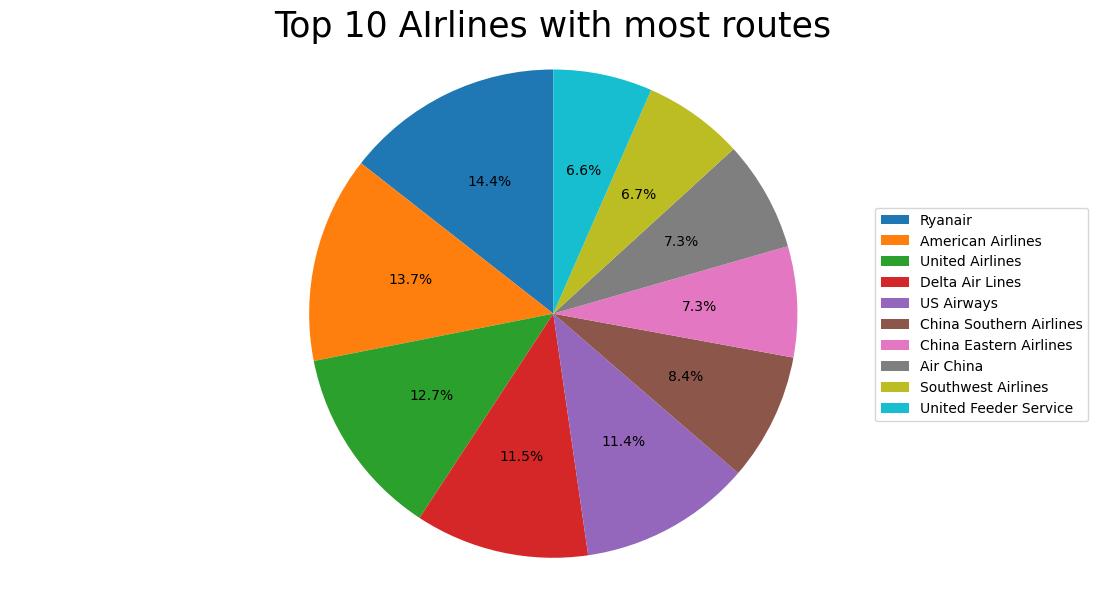

In [45]:
plot_df = (
    final_routes['Airline_Name'].value_counts()
        .head(10)
        .rename_axis('Airline_Name')
        .reset_index(name='no_of_routes')
)
plt.figure(figsize=(14,7))
y=  final_routes['Airline_Name'].value_counts().head(10)
mylabels = plot_df['Airline_Name']

plt.title('Top 10 AIrlines with most routes', fontsize=25)

pie = plt.pie(y,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'right', labels=mylabels)
plt.show()

## VIS_2: Top 10 Airports with maximum connectivity

In [56]:
plot_df = (
    final_routes['Source_airport'].value_counts()
        .rename_axis('Airport_Name_s')
        .reset_index(name='no_of_flights_o')
)
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3409 entries, 0 to 3408
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airport_Name_s   3409 non-null   object
 1   no_of_flights_o  3409 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.4+ KB


In [57]:
plot_df1 = (
    final_routes['Destination_airport'].value_counts()
        .rename_axis('Airport_Name_d')
        .reset_index(name='no_of_flights_i')
)
plot_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airport_Name_d   3418 non-null   object
 1   no_of_flights_i  3418 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 53.5+ KB


In [58]:
plot_df2= pd.merge(left = plot_df, 
                 right = plot_df1,
                 how= 'outer',
                 left_on='Airport_Name_s',
                 right_on='Airport_Name_d',
                 suffixes=('_x', '_y'))
plot_df2 = plot_df2.head(10)
plot_df2.drop(['Airport_Name_d'], axis=1, inplace = True)
plot_df2

,Airport_Name_s,no_of_flights_o,no_of_flights_i
0,ATL,938.0,934.0
1,FRA,680.0,673.0
2,CDG,589.0,580.0
3,ORD,570.0,561.0
4,PEK,561.0,560.0
5,LHR,552.0,549.0
6,SIN,530.0,536.0
7,LGW,529.0,521.0
8,MUC,520.0,512.0
9,BCN,518.0,519.0


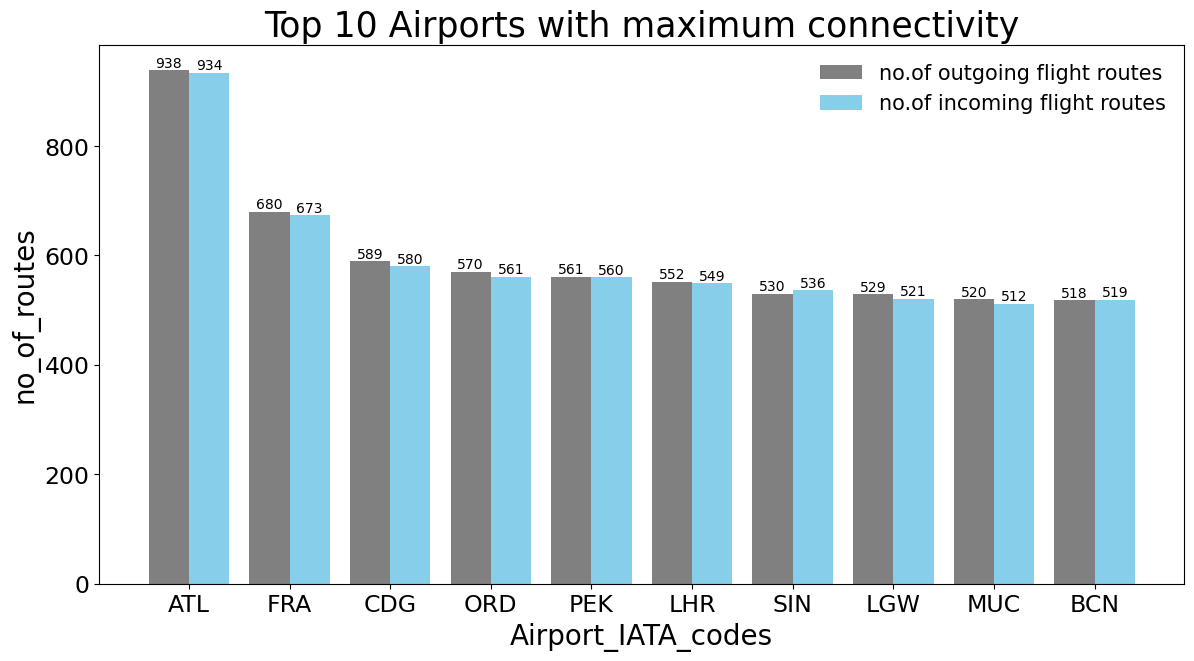

In [59]:
fig, ax = plt.subplots(figsize=(14,7))
x = np.arange(len(plot_df2))
width = 0.4
p1 = plt.bar(x-0.2, plot_df2['no_of_flights_o'],width, color='grey', label='no.of outgoing flight routes')
p2 = plt.bar(x+0.2, plot_df2['no_of_flights_i'],width, color='skyblue', label='no.of incoming flight routes')

plt.bar_label(p1, label_type='edge')
plt.bar_label(p2, label_type='edge')

plt.title('Top 10 Airports with maximum connectivity', fontsize=25)
plt.xlabel('Airport_IATA_codes', fontsize=20)
plt.xticks(plot_df2.index, plot_df2['Airport_Name_s'], fontsize=17)
plt.ylabel('no_of_routes', fontsize=20)
plt.yticks(fontsize=17)

plt.legend(frameon=False, fontsize=15)
plt.show()

## VIS_3: Plotting Top 10 Airports with most connectivity

In [50]:
folium_df = pd.merge(left = plot_df2, 
                 right = airports,
                 how= 'left',
                 left_on='Airport_Name_s',
                 right_on='IATA',
                 suffixes=('_l', '_r'))

In [51]:
import folium

map_1 = folium.Map(location=[0, 0])
folium_df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]).add_to(map_1),axis=1)
map_1

## VIS_4: Planes that fly the most amount of routes

In [52]:
final_routes['Equipment'].value_counts()

320                    10823
738                     7889
319                     4041
73H                     2551
737                     2491
                       ...  
321 77W 333 343            1
320 773                    1
772 77W 333 773 343        1
AT7 ER4 CRJ                1
717 CR7                    1
Name: Equipment, Length: 3945, dtype: int64

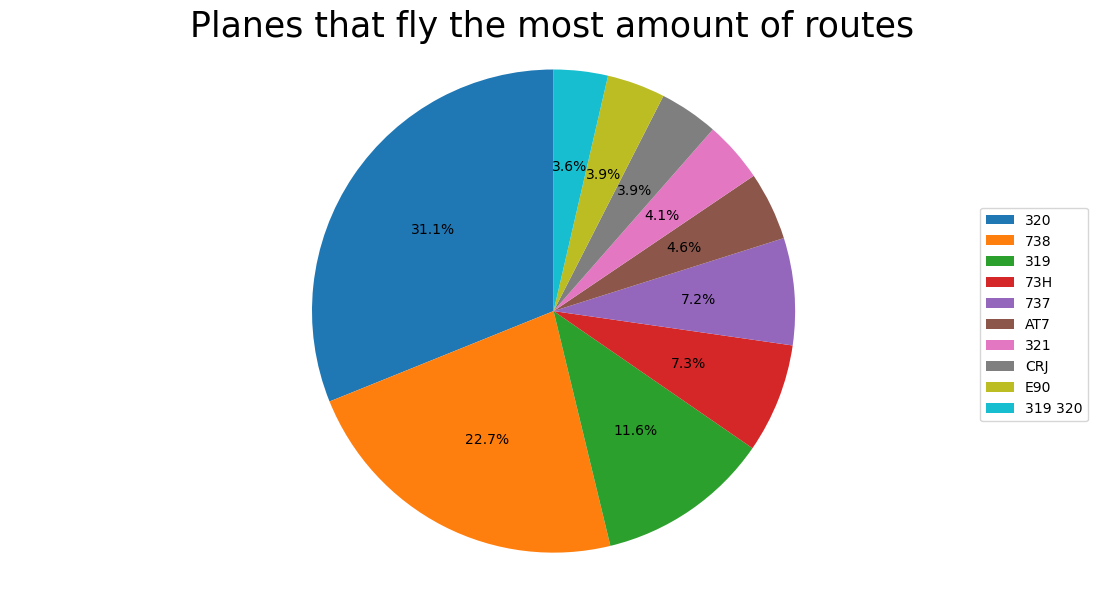

In [53]:
plot_df4 = (
    final_routes['Equipment'].value_counts()
        .head(10)
        .rename_axis('Plane')
        .reset_index(name='no_of_routes')
)
plt.figure(figsize=(14,7))
y=  final_routes['Equipment'].value_counts().head(10)
mylabels = plot_df4['Plane']

plt.title('Planes that fly the most amount of routes', fontsize=25)

pie = plt.pie(y,autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend( loc = 'right', labels=mylabels)
plt.show()

## Cities with most connectivity

In [61]:
plot_df5 = (
    final_routes['City_s'].value_counts()
        .rename_axis('City_Name_s')
        .reset_index(name='no_of_flights_o')
)
plot_df5.info()

plot_df6 = (
    final_routes['City_d'].value_counts()
        .rename_axis('City_Name_d')
        .reset_index(name='no_of_flights_i')
)
plot_df6.info()



plot_df7 = pd.merge(left = plot_df5, 
                 right = plot_df6,
                 how= 'outer',
                 left_on='City_Name_s',
                 right_on='City_Name_d',
                 suffixes=('_x', '_y'))

plot_df7 = plot_df7.head(10)
plot_df7.drop(['City_Name_d'], axis=1, inplace = True)
plot_df7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City_Name_s      3221 non-null   object
 1   no_of_flights_o  3221 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3226 entries, 0 to 3225
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City_Name_d      3226 non-null   object
 1   no_of_flights_i  3226 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.5+ KB


,City_Name_s,no_of_flights_o,no_of_flights_i
0,London,1539.0,1523.0
1,Atlanta,938.0,934.0
2,Paris,847.0,840.0
3,Istanbul,723.0,726.0
4,Chicago,709.0,693.0
5,Shanghai,708.0,713.0
6,Frankfurt,680.0,673.0
7,Moscow,664.0,663.0
8,Beijing,641.0,640.0
9,New York,626.0,626.0


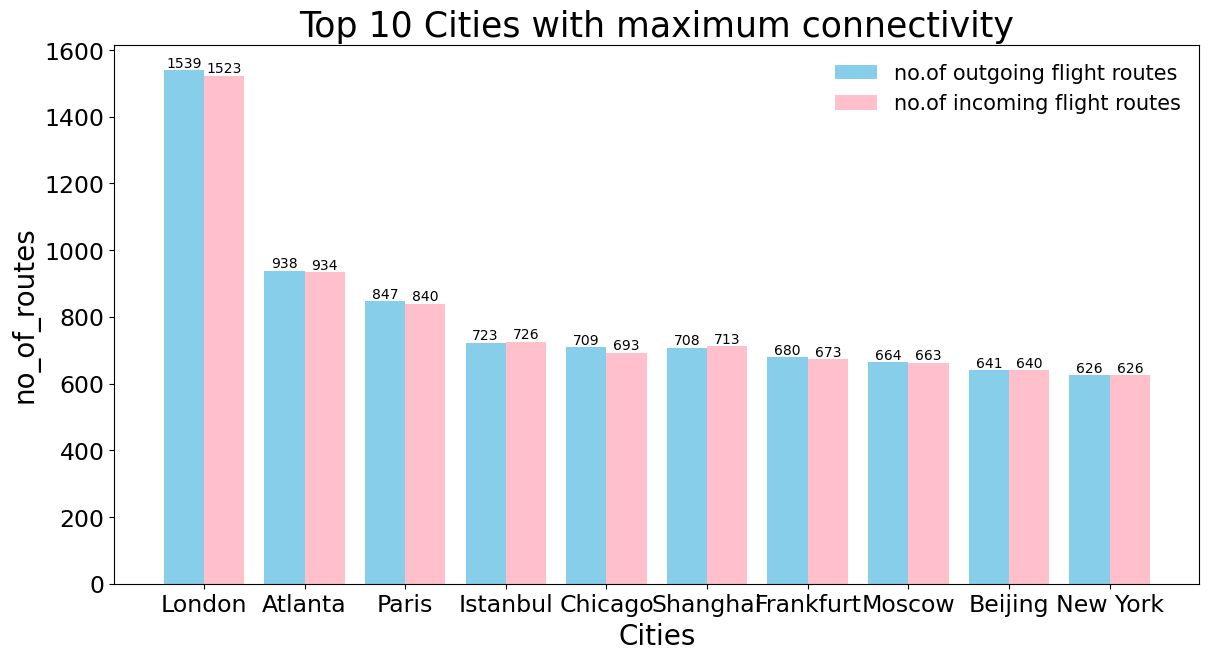

In [70]:
fig, ax = plt.subplots(figsize=(14,7))
x = np.arange(len(plot_df2))
width = 0.4
p1 = plt.bar(x-0.2, plot_df7['no_of_flights_o'],width, color='skyblue', label='no.of outgoing flight routes')
p2 = plt.bar(x+0.2, plot_df7['no_of_flights_i'],width, color='pink', label='no.of incoming flight routes')

plt.bar_label(p1, label_type='edge')
plt.bar_label(p2, label_type='edge')

plt.title('Top 10 Cities with maximum connectivity', fontsize=25)
plt.xlabel('Cities', fontsize=20)
plt.xticks(plot_df7.index, plot_df7['City_Name_s'], fontsize=17)
plt.ylabel('no_of_routes', fontsize=20)
plt.yticks(fontsize=17)

plt.legend(frameon=False, fontsize=15)
plt.show()